In [148]:
import tensorflow as tf

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [168]:
import librosa
import librosa.display
from tqdm import tqdm
import glob

# Ouverture de l'audio et affichage temporel

In [905]:
from IPython import display as ipd
ipd.Audio('cat&dog/cats_dogs/dog_barking_4.wav')

110250


/var/folders/qp/mjll527j02lgnssvry8v_jth0000gn/T/ipykernel_63090/2225777510.py:1: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio, sr = librosa.load('cat&dog/cats_dogs/dog_barking_4.wav',22050, duration =5 )


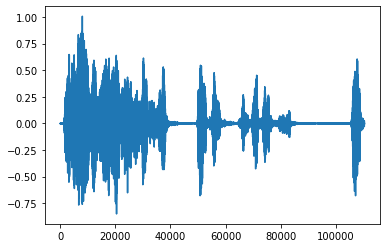

In [907]:
audio, sr = librosa.load('cat&dog/cats_dogs/dog_barking_4.wav',22050, duration =5 )
pad_len = 110250 - len(audio)
print(len(audio))
audio = np.pad(audio, (0, pad_len))
plt.plot(audio)

/var/folders/qp/mjll527j02lgnssvry8v_jth0000gn/T/ipykernel_63090/1347071013.py:1: FutureWarning: Pass y=[0.05112126 0.07937934 0.07613952 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio,n_mfcc=5)


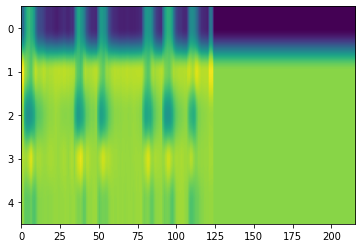

In [383]:
mfcc = librosa.feature.mfcc(audio,n_mfcc=5)
#mfcc.shape
plt.imshow(mfcc,aspect='auto')

# Spectrogram

In [625]:
def calcul_median(spectrogram):
    median=[]
    line, colone=spectrogram.shape
    for i in range (0,line):
        new_line=[]
        for j in range(0,colone):
            if spectrogram[i][j]>0:
                new_line.append(spectrogram[i][j])
        med=np.median(new_line)
        if np.isnan(med):
            median.append(0)
        else:
            median.append(med)
    return  median

(1025, 311)


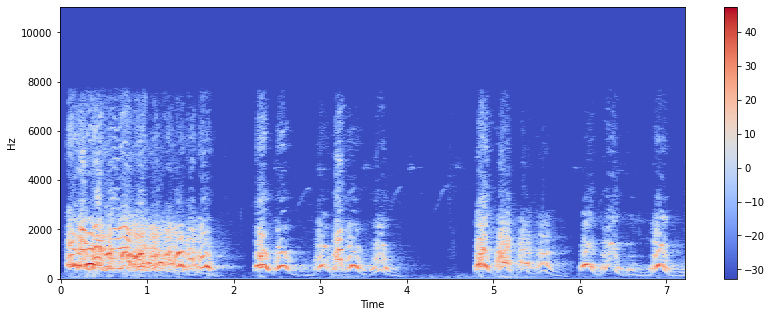

In [902]:
file_path='cat&dog/cats_dogs/dog_barking_4.wav'
x, sr = librosa.load(file_path)
X = librosa.stft(x)

Xdb = librosa.amplitude_to_db(abs(X))
print(Xdb.shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
#plt.ylabel('Log')
plt.colorbar()

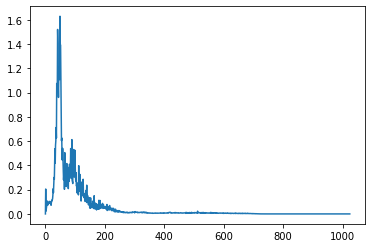

In [903]:
median=calcul_median(X)
  
plt.plot(median)

(1025, 517)


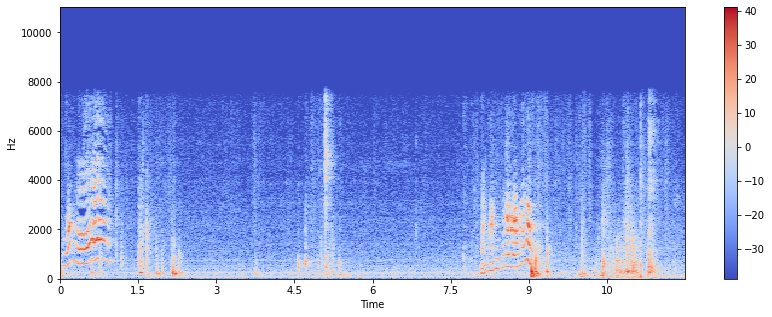

In [898]:
file_path1='cat&dog/cats_dogs/cat_2.wav'
x, sr = librosa.load(file_path1)
X = librosa.stft(x)

Xdb = librosa.amplitude_to_db(abs(X))
print(Xdb.shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
#plt.ylabel('Log')
plt.colorbar()

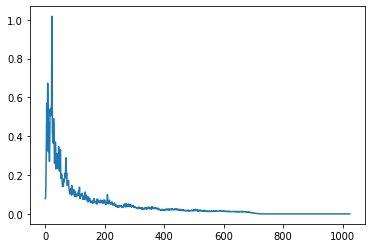

In [899]:
median=calcul_median(X)
  
plt.plot(median)

# Preprocessing

In [795]:

def audio_processing(file):
    audio_list=[]
    name_file=[]
    for name in tqdm(glob.glob(file+'/*/*')):
        x, sr = librosa.load(name, sr=44100)
        X = librosa.stft(x)
        #Xdb = librosa.amplitude_to_db(abs(X))
        Y=calcul_median(abs(X))
        #Y=np.transpose(Y)
        #Y=tf.constant(Y)
        audio_list.append(Y)
        name_file.append(name)
    return audio_list, name_file

    
    

In [908]:
audio_list,name_file=audio_processing('cat&dog/cats_dogs/train')

100%|█████████████████████████████████████████| 200/200 [06:47<00:00,  2.04s/it]


Mise en forme dataframe 

In [909]:
d={'name_file':name_file,'median spectrogram':audio_list}
df=pd.DataFrame(data=d)
df['cat_or_dog']=0 
df.cat_or_dog[df['name_file'].str.contains('barking')]=1
df

/var/folders/qp/mjll527j02lgnssvry8v_jth0000gn/T/ipykernel_63090/1934248645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cat_or_dog[df['name_file'].str.contains('barking')]=1


,name_file,median spectrogram,cat_or_dog
0,cat&dog/cats_dogs/train/cat/cat_74.wav,"[13.070796, 8.424239, 6.46194, 4.477538, 3.273...",0
1,cat&dog/cats_dogs/train/cat/cat_60.wav,"[17.939024, 9.468056, 30.954823, 44.70224, 14....",0
2,cat&dog/cats_dogs/train/cat/cat_48.wav,"[0.03356901, 0.039762326, 0.082253374, 0.23530...",0
3,cat&dog/cats_dogs/train/cat/cat_132.wav,"[0.07401448, 0.1217211, 0.31664476, 0.4141313,...",0
4,cat&dog/cats_dogs/train/cat/cat_127.wav,"[0.11992389, 0.13413079, 0.09018831, 0.0737142...",0
...,...,...,...
195,cat&dog/cats_dogs/train/dog/dog_barking_84.wav,"[1.2274053, 0.7710816, 0.18452042, 0.08261616,...",1
196,cat&dog/cats_dogs/train/dog/dog_barking_102.wav,"[1.8207911, 3.6102848, 5.789312, 9.922215, 13....",1
197,cat&dog/cats_dogs/train/dog/dog_barking_103.wav,"[0.058362857, 0.07185701, 0.12372972, 0.327822...",1
198,cat&dog/cats_dogs/train/dog/dog_barking_85.wav,"[1.871928, 1.6706556, 0.8978286, 0.4743369, 0....",1


In [910]:
label=np.array(df['cat_or_dog'])

In [911]:
audio_list1=np.array(audio_list)


In [912]:
audio_list2,name_file2=audio_processing('cat&dog/cats_dogs/test')

100%|███████████████████████████████████████████| 67/67 [01:57<00:00,  1.75s/it]


In [913]:
d1={'name_file':name_file2,'median spectrogram':audio_list2}
df1=pd.DataFrame(data=d1)
df1['cat_or_dog']=0 
df1.cat_or_dog[df1['name_file'].str.contains('barking')]=1
df1



/var/folders/qp/mjll527j02lgnssvry8v_jth0000gn/T/ipykernel_63090/124467351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.cat_or_dog[df1['name_file'].str.contains('barking')]=1


,name_file,median spectrogram,cat_or_dog
0,cat&dog/cats_dogs/test/cats/cat_126.wav,"[0.30401248, 0.3363535, 0.15390456, 0.08491137...",0
1,cat&dog/cats_dogs/test/cats/cat_133.wav,"[201.25888, 100.94498, 1.9202583, 1.0852154, 0...",0
2,cat&dog/cats_dogs/test/cats/cat_61.wav,"[0.6210413, 0.8463338, 0.97641444, 0.7512387, ...",0
3,cat&dog/cats_dogs/test/cats/cat_75.wav,"[0.016031988, 0.008204906, 0.0048162527, 0.010...",0
4,cat&dog/cats_dogs/test/cats/cat_88.wav,"[0.07308841, 0.046632268, 0.03290151, 0.063913...",0
...,...,...,...
62,cat&dog/cats_dogs/test/test/dog_barking_44.wav,"[1.5420629, 1.3837059, 1.3057133, 0.76641995, ...",1
63,cat&dog/cats_dogs/test/test/dog_barking_45.wav,"[2.2481284, 1.9892509, 1.7318779, 0.97313046, ...",1
64,cat&dog/cats_dogs/test/test/dog_barking_90.wav,"[0.016079197, 0.036583796, 0.117946304, 0.1061...",1
65,cat&dog/cats_dogs/test/test/dog_barking_91.wav,"[0.018294696, 0.04362762, 0.12107338, 0.109246...",1


In [914]:
label2=np.array(df1['cat_or_dog'])
audio_list2=np.array(audio_list2)

In [915]:
input_shape=audio_list1[1].shape
input_shape

(1025,)

In [916]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

from sklearn.metrics import classification_report, log_loss, accuracy_score

In [917]:
tf.config.run_functions_eagerly(True)

In [918]:
input_tensor = layers.Input(shape = input_shape)
x=layers.Dense(20,activation='relu')(input_tensor)
x=layers.Dense(20,activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(input_tensor, output_tensor)
model.summary()

Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 1025)]            0         
                                                                 
 dense_137 (Dense)           (None, 20)                20520     
                                                                 
 dense_138 (Dense)           (None, 20)                420       
                                                                 
 dense_139 (Dense)           (None, 1)                 21        
                                                                 
Total params: 20,961
Trainable params: 20,961
Non-trainable params: 0
_________________________________________________________________


In [919]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [920]:
his=model.fit(audio_list1, label,epochs = 50,validation_data =(audio_list2,label2),shuffle = True,)

Epoch 1/50
7/7 [==============================] - 0s 35ms/step - loss: 0.2040 - accuracy: 0.6050 - val_loss: 0.1477 - val_accuracy: 0.7612
Epoch 2/50
7/7 [==============================] - 0s 36ms/step - loss: 0.1537 - accuracy: 0.7350 - val_loss: 0.1415 - val_accuracy: 0.6716
Epoch 3/50
7/7 [==============================] - 0s 31ms/step - loss: 0.1480 - accuracy: 0.7350 - val_loss: 0.1314 - val_accuracy: 0.7761
Epoch 4/50
7/7 [==============================] - 0s 27ms/step - loss: 0.1329 - accuracy: 0.8000 - val_loss: 0.1233 - val_accuracy: 0.8358
Epoch 5/50
7/7 [==============================] - 0s 42ms/step - loss: 0.1239 - accuracy: 0.8450 - val_loss: 0.1179 - val_accuracy: 0.8657
Epoch 6/50
7/7 [==============================] - 0s 34ms/step - loss: 0.1161 - accuracy: 0.8500 - val_loss: 0.1136 - val_accuracy: 0.8507
Epoch 7/50
7/7 [==============================] - 0s 29ms/step - loss: 0.1116 - accuracy: 0.8450 - val_loss: 0.1109 - val_accuracy: 0.8358
Epoch 8/50
7/7 [===========

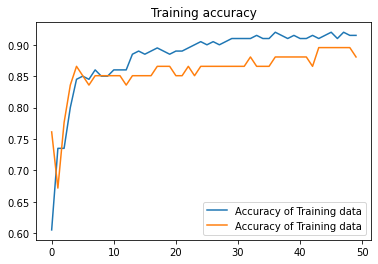

<Figure size 432x288 with 0 Axes>

In [921]:
get_acc = his.history['accuracy']
val_accu=his.history['val_accuracy']
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, val_accu, label='Accuracy of Training data')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

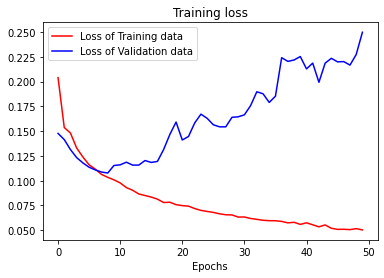

<Figure size 432x288 with 0 Axes>

In [922]:
get_loss = his.history['loss']
val_loss=his.history['val_loss']
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs,val_loss,'b',label='Loss of Validation data')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

In [694]:
#model.predict(audio_list)

In [875]:
y_pred0=model.predict(audio_list1)
#y_pred=np.argmax(y_pred0,axis=1)
#y_true = np.array(label1)
y_pred0

array([[0.3008029 ],
       [0.37760594],
       [0.46280804],
       [0.46324092],
       [0.36290228],
       [0.56506443],
       [0.36178648],
       [0.42576206],
       [0.29683977],
       [0.28340685],
       [0.29695886],
       [0.3889299 ],
       [0.43279174],
       [0.27987856],
       [0.4734197 ],
       [0.4323082 ],
       [0.5165038 ],
       [0.30610842],
       [0.16536641],
       [0.50492316],
       [0.24426961],
       [0.40403208],
       [0.28562963],
       [0.30173475],
       [0.29089183],
       [0.44250935],
       [0.45630023],
       [0.29421216],
       [0.37271228],
       [0.43724084],
       [0.05288729],
       [0.01859316],
       [0.3269004 ],
       [0.13920996],
       [0.39033237],
       [0.3818306 ],
       [0.3523946 ],
       [0.1653566 ],
       [0.4039606 ],
       [0.5040393 ],
       [0.28480625],
       [0.21371976],
       [0.4281536 ],
       [0.30122262],
       [0.0566462 ],
       [0.49240327],
       [0.0312072 ],
       [0.348

In [888]:
input_tensor = layers.Input(shape = input_shape)
x=layers.Dense(20,activation='relu')(input_tensor)
x=layers.Dense(20,activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(input_tensor, output_tensor)
model.summary()

Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_60 (InputLayer)       [(None, 1025)]            0         
                                                                 
 dense_134 (Dense)           (None, 20)                20520     
                                                                 
 dense_135 (Dense)           (None, 20)                420       
                                                                 
 dense_136 (Dense)           (None, 1)                 21        
                                                                 
Total params: 20,961
Trainable params: 20,961
Non-trainable params: 0
_________________________________________________________________


In [889]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [890]:
his=model.fit(audio_list1, label,epochs = 15,validation_data =(audio_list2,label2),shuffle = True)

Epoch 1/15
7/7 [==============================] - 0s 35ms/step - loss: 0.2539 - accuracy: 0.5150 - val_loss: 0.1689 - val_accuracy: 0.6716
Epoch 2/15
7/7 [==============================] - 0s 35ms/step - loss: 0.1552 - accuracy: 0.7300 - val_loss: 0.1307 - val_accuracy: 0.7761
Epoch 3/15
7/7 [==============================] - 0s 36ms/step - loss: 0.1278 - accuracy: 0.8250 - val_loss: 0.1259 - val_accuracy: 0.8209
Epoch 4/15
7/7 [==============================] - 0s 46ms/step - loss: 0.1166 - accuracy: 0.8350 - val_loss: 0.1243 - val_accuracy: 0.8209
Epoch 5/15
7/7 [==============================] - 0s 63ms/step - loss: 0.1100 - accuracy: 0.8450 - val_loss: 0.1200 - val_accuracy: 0.8209
Epoch 6/15
7/7 [==============================] - 0s 55ms/step - loss: 0.1056 - accuracy: 0.8600 - val_loss: 0.1202 - val_accuracy: 0.8209
Epoch 7/15
7/7 [==============================] - 0s 40ms/step - loss: 0.1009 - accuracy: 0.8650 - val_loss: 0.1196 - val_accuracy: 0.8209
Epoch 8/15
7/7 [===========

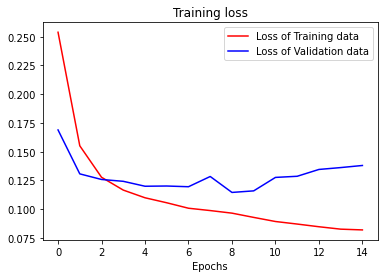

<Figure size 432x288 with 0 Axes>

In [891]:
get_loss = his.history['loss']
val_loss=his.history['val_loss']
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs,val_loss,'b',label='Loss of Validation data')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

In [854]:
audio_list3,name_file3=audio_processing('cat&dog/cats_dogs/val_final')

100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.78s/it]


In [855]:
d2={'name_file':name_file3,'median spectrogram':audio_list3}
df2=pd.DataFrame(data=d2)
df2['cat_or_dog']=0 
df2.cat_or_dog[df2['name_file'].str.contains('barking')]=1
df2

/var/folders/qp/mjll527j02lgnssvry8v_jth0000gn/T/ipykernel_63090/415085263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.cat_or_dog[df2['name_file'].str.contains('barking')]=1


,name_file,median spectrogram,cat_or_dog
0,cat&dog/cats_dogs/val_final/dogs/dog_barking_1...,"[0.9715572, 1.0173239, 0.84960407, 0.91929936,...",1
1,cat&dog/cats_dogs/val_final/dogs/dog_barking_1...,"[0.28347194, 0.14306948, 0.044304293, 0.082282...",1
2,cat&dog/cats_dogs/val_final/dogs/dog_barking_0...,"[0.1526222, 0.10562071, 0.14889577, 0.15341699...",1
3,cat&dog/cats_dogs/val_final/dogs/dog_barking_1...,"[9.459037, 10.503667, 4.454838, 1.9342685, 1.3...",1
4,cat&dog/cats_dogs/val_final/dogs/dog_barking_1...,"[0.030019421, 0.043407626, 0.05411639, 0.06521...",1
5,cat&dog/cats_dogs/val_final/cat/cat_99.wav,"[0.016881946, 0.016965892, 0.038641527, 0.0917...",0
6,cat&dog/cats_dogs/val_final/cat/cat_98.wav,"[0.018341657, 0.019222753, 0.041385725, 0.0992...",0
7,cat&dog/cats_dogs/val_final/cat/cat_96.wav,"[1.0460179, 2.2920027, 2.1812496, 1.4131825, 1...",0
8,cat&dog/cats_dogs/val_final/cat/cat_97.wav,"[0.0242223, 0.028807152, 0.05570177, 0.1293208...",0
9,cat&dog/cats_dogs/val_final/cat/cat_95.wav,"[1.0234528, 2.16913, 2.3140771, 1.5185192, 1.4...",0


In [883]:
label3=np.array(df2['cat_or_dog'])
label3

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [884]:
audio_list3=np.array(audio_list3)

In [892]:
#tf.data.experimental.enable_debug_mode()
y_pred0=model.predict(audio_list3)
#y_pred=np.argmax(y_pred0,axis=1)
#y_true = np.array(label3)
y_pred0

array([[0.8672973 ],
       [0.585214  ],
       [0.5154169 ],
       [0.3327117 ],
       [0.46419728],
       [0.49061877],
       [0.5003992 ],
       [0.41821337],
       [0.7318031 ],
       [0.41649163]], dtype=float32)

In [894]:
score = model.evaluate(audio_list3,label3)
print(score)

1/1 [==============================] - 0s 49ms/step - loss: 0.2190 - accuracy: 0.6000
[0.21897558867931366, 0.6000000238418579]
